In [1]:
%load_ext autoreload
%autoreload 2
from RTKToArrayConversion import *
from ExtendedConeBeamDCC import *
from AllAcquisitionCD_Beta_Class import *

In [31]:
filesdir_ref = "/home/mmouchet/Documents/SIEMENSDATA/GO.SIM/3D_patients/BM13/donneesBrutes/respi_libre/"
# reading projections
proj = itk.imread(filesdir_ref+"sub_corrected_proj.mha")
# Reading the geometry of the scanner
xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
xmlreader.SetFilename(filesdir_ref+'sub_geometry.xml')
# xmlreader.SetFilename(filesdir_ref+"geometry.xml")
xmlreader.GenerateOutputInformation()
geometry = xmlreader.GetOutputObject()
print('nproj = %d'%(len(geometry.GetGantryAngles())))
print(proj.GetLargestPossibleRegion().GetSize())

nproj = 3034
itkSize3 ([920, 32, 3034])


In [32]:
geometry_array = RTKtoNP(geometry)
proj_array = itk.GetArrayFromImage(proj)
proj_infos = GetProjectionInformations(proj)
source_pos_array = GetSourcePositions(geometry)
rotation_matrices_array = GetRotationMatrices(geometry)
fixed_matrices_array = GetFixedSystemMatrices(geometry)
print(proj_infos)

AcquiDCC = DCCOnCDinAnAcquisition(geometry_array, source_pos_array, rotation_matrices_array, fixed_matrices_array, proj_array, proj_infos)

[array([1.02806101, 1.0947541 , 1.        ]), array([0., 0., 0.]), array([ 920,   32, 3034]), array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])]


In [33]:
# #default
# idx_min=0
# idx_max=AcquiDCC.n_proj
#En fonction de la troncature des epaules
idx_min = 0
idx_max = AcquiDCC.n_proj
print(idx_min,idx_max, geometry_array[8, idx_min])
ref_list = np.arange(idx_min,idx_max)
print(len(ref_list))

0 3034 284.49
3034


In [34]:
# #methods A
# AcquiDCC.ComputeAllPossiblePairs(ref_list, 'False')
# for i in range(len(ref_list)):
#     print(len(AcquiDCC.tot_pairs[i]))
# AcquiDCC.ComputeDCCForAllPairs()
# #Extract the pairsµ
# pairs = []
# weights = []
# for i in range(len(ref_list)):
#     for j in range(len(AcquiDCC.tot_pairs[i])):
#         if [AcquiDCC.tot_pairs[i][j].idx0, AcquiDCC.tot_pairs[i][j].idx1] in pairs or [AcquiDCC.tot_pairs[i][j].idx1, AcquiDCC.tot_pairs[i][j].idx0] in pairs:
#             pass
#         else:
#             pairs.append([AcquiDCC.tot_pairs[i][j].idx0, AcquiDCC.tot_pairs[i][j].idx1])
#             weights.append([AcquiDCC.tot_pairs[i][j].idx0, AcquiDCC.tot_pairs[i][j].idx1, np.abs(np.mean(AcquiDCC.tot_pairs[i][j].mhr0)-np.mean(AcquiDCC.tot_pairs[i][j].mhr1))])

In [35]:
AcquiDCC.n_proj_per_rotation

103

In [36]:
#Method B
AcquiDCC.ComputeAllPossiblePairsIdx(ref_list, 'True', idx_min, idx_max)

divide by zero encountered in true_divide
divide by zero encountered in true_divide



278876
139438


0

In [37]:
AcquiDCC.ComputeDCCForAllPairsIdx('0', 'Hann', 10)

3034 139438


<IPython.core.display.Javascript object>


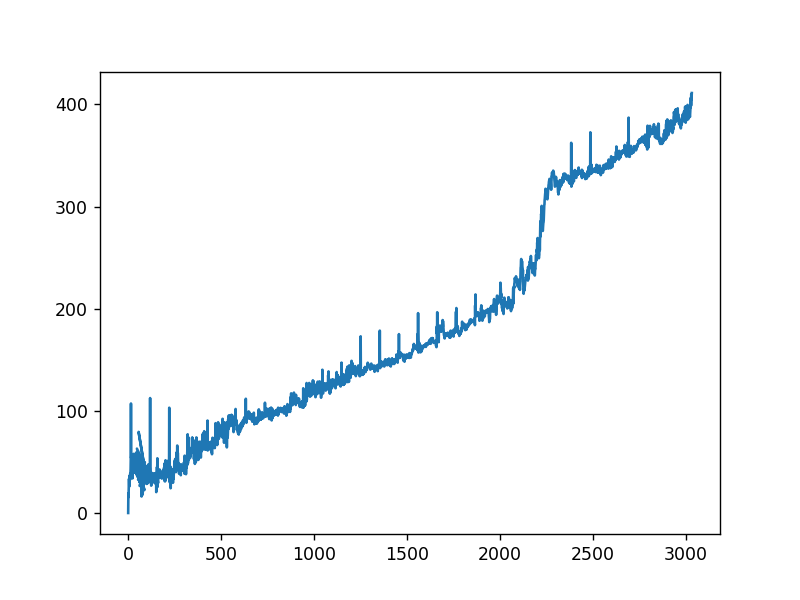

In [38]:
import networkx as nx
# #Method A
# G = nx.Graph()
# G.add_nodes_from(range(AcquiDCC.n_proj))
# G.add_weighted_edges_from(weights)
# print(G.number_of_nodes(), G.number_of_edges())
# length, path = nx.single_source_dijkstra(G, 0)

# #Method B
G = nx.Graph()
G.add_weighted_edges_from(AcquiDCC.tot_pairs_moments)
print(G.number_of_nodes(), G.number_of_edges())
length, path = nx.single_source_dijkstra(G,np.array(G.nodes)[0] )

import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(np.array(G.nodes),[length[i] for i in G.nodes])
plt.show()

In [39]:
# Fonction non parallélisée 
# AcquiDCC.ComputeDCCForAllPairs()

# AcquiDCC.ComputeDCCForAllPairsPara()
#AcquiDCC.pairs

In [40]:
import csv
import ast

def WriteEdgesGraph(FileName, pairs):
    with open(FileName, 'w') as csvfile:
        fieldnames = ['pairs']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i in range(len(pairs)):
            writer.writerow({'pairs': pairs[i]})
    return 0
WriteEdgesGraph( filesdir_ref + "graph_respi_libre_sub100.csv", AcquiDCC.tot_pairs_moments)

0